<a href="https://colab.research.google.com/github/V-Vibee/Assignments/blob/main/Model_builbing_with_Sumit_shukla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [5]:
from sklearn.datasets import load_boston 

# House Price

boston= load_boston()

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [7]:
df= pd.DataFrame(boston['data'], columns=boston['feature_names'])

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
df['house_price']= boston['target']

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
df.isnull().sum()

CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT          0
house_price    0
dtype: int64

In [12]:
X= df.drop("house_price", axis=1)
y=df['house_price']

In [13]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=100)

In [14]:
 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

In [16]:
X_train.shape

(354, 13)

In [17]:
lr= LinearRegression()
rfecv= RFECV(estimator= lr,cv=5, step=1, scoring='neg_mean_absolute_error')
rfecv.fit(X_train, y_train)

RFECV(cv=5, estimator=LinearRegression(), scoring='neg_mean_absolute_error')

In [18]:
rfecv.grid_scores_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


array([[-4.5439402 , -4.26445819, -3.92317121, -4.44586925, -5.58173656],
       [-3.67668252, -3.81624693, -3.4004007 , -3.71096775, -4.93710511],
       [-3.6993719 , -3.87281192, -2.96794343, -3.50948672, -4.24889831],
       [-3.70468912, -3.80289642, -2.92849684, -3.53750548, -4.18250803],
       [-3.57371924, -3.63293713, -2.82396934, -3.54203968, -4.14813672],
       [-3.68016223, -3.48724781, -2.75424649, -3.23717451, -4.14242097],
       [-3.56482046, -3.56504695, -2.68943966, -3.35424713, -4.10365115],
       [-3.52231826, -3.50903263, -2.55673288, -3.26507372, -3.93008914],
       [-3.41469178, -3.47180247, -2.66018202, -3.19444879, -3.98865699],
       [-3.44048796, -3.49896671, -2.5630202 , -2.96374879, -4.03470215],
       [-3.37208266, -3.56344855, -2.54400981, -2.93729167, -4.08344704],
       [-3.33821756, -3.50043019, -2.52362692, -2.96917981, -4.09193248],
       [-3.33774649, -3.49697504, -2.53873937, -2.98158837, -4.10723614]])

In [19]:
-(rfecv.grid_scores_)

array([[4.5439402 , 4.26445819, 3.92317121, 4.44586925, 5.58173656],
       [3.67668252, 3.81624693, 3.4004007 , 3.71096775, 4.93710511],
       [3.6993719 , 3.87281192, 2.96794343, 3.50948672, 4.24889831],
       [3.70468912, 3.80289642, 2.92849684, 3.53750548, 4.18250803],
       [3.57371924, 3.63293713, 2.82396934, 3.54203968, 4.14813672],
       [3.68016223, 3.48724781, 2.75424649, 3.23717451, 4.14242097],
       [3.56482046, 3.56504695, 2.68943966, 3.35424713, 4.10365115],
       [3.52231826, 3.50903263, 2.55673288, 3.26507372, 3.93008914],
       [3.41469178, 3.47180247, 2.66018202, 3.19444879, 3.98865699],
       [3.44048796, 3.49896671, 2.5630202 , 2.96374879, 4.03470215],
       [3.37208266, 3.56344855, 2.54400981, 2.93729167, 4.08344704],
       [3.33821756, 3.50043019, 2.52362692, 2.96917981, 4.09193248],
       [3.33774649, 3.49697504, 2.53873937, 2.98158837, 4.10723614]])

In [22]:
x1= [i+1 for i in range(X_train.shape[1])]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


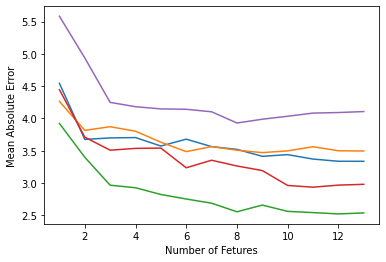

In [26]:
import matplotlib.pyplot as plt

plt.plot(x1, -(rfecv.grid_scores_))
plt.xlabel("Number of Fetures")
plt.ylabel("Mean Absolute Error")
plt.show()

In [ ]:
n=8